<a href="https://colab.research.google.com/github/Rioba-Ian/Statistics/blob/main/Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Analysis and Prediction
## Stock market data shall be from Google Finance
By looking at data from the stock market particulary the large cap sized companies. We shall visualize ifferent aspcets of teh ata and finally llok at ateh ways of analyzing the risk of the stock, based on previous performance history. 

In [ ]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

> Reading stock data from yahoo
> timestamps 
> Division

In [ ]:
from pandas_datareader import DataReader 

from datetime import datetime

from __future__ import division

### Basic analysis of stock information

We shall handle requests for stock information with pandas an hwo to analyse teh absic attributes of a stock

In [ ]:
#List of the companies
stock_list = ['AAPL', 'GOOGL', 'AMZN', 'NFLX']

#setup the start and end time for data grabbing
end = datetime.now()
start = datetime(end.year-5, end.month, end.day)

#a for loop for getting the data from google finance data as a dataframe
#set dataframe as the stockticker

for stock in stock_list:
    globals()[stock] = DataReader(stock, 'yahoo', start,end)
## We used yahoo since google got deprecated

In [ ]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-25,25.382500,24.802500,25.379999,24.860001,207178000.0,23.032082
2016-01-26,25.219999,24.517500,24.982500,24.997499,300308000.0,23.159468
2016-01-27,24.157499,23.334999,24.010000,23.355000,533478800.0,21.637739
2016-01-28,23.629999,23.097500,23.447500,23.522499,222715200.0,21.792925
2016-01-29,24.334999,23.587500,23.697500,24.334999,257666000.0,22.545681


In [ ]:
GOOGL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-25,752.460022,732.500000,743.840027,733.619995,2267000,733.619995
2016-01-26,739.460022,726.969971,735.210022,733.789978,1547000,733.789978
2016-01-27,735.890015,713.450012,735.890015,717.580017,2121400,717.580017
2016-01-28,751.159973,730.599976,738.190002,748.299988,3105200,748.299988
2016-01-29,765.109985,744.200012,748.960022,761.349976,3790400,761.349976


In [ ]:
NFLX.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-25,102.680000,99.000000,99.779999,99.120003,20321100,99.120003
2016-01-26,100.550003,94.849998,99.739998,97.830002,22083900,97.830002
2016-01-27,97.849998,90.589996,96.610001,91.150002,25556200,91.150002
2016-01-28,95.250000,90.110001,93.839996,94.410004,24562300,94.410004
2016-01-29,94.389999,90.629997,92.000000,91.839996,20463900,91.839996


In [ ]:
NFLX.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000
mean,281.471207,272.639897,277.150334,277.246203,8.924473e+06,277.246203
std,134.068525,129.310281,131.776916,131.788833,5.765152e+06,131.788833
min,84.699997,79.949997,80.570000,82.790001,1.144000e+06,82.790001
25%,148.244995,145.770004,146.824997,147.430000,5.254500e+06,147.430000
50%,299.160004,290.250000,295.000000,294.339996,7.235100e+06,294.339996
75%,369.924988,359.864990,365.000000,364.180008,1.081405e+07,364.180008
max,593.289978,570.400024,582.450012,586.340027,5.841040e+07,586.340027


In [ ]:
NFLX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2016-01-25 to 2021-01-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1259 non-null   float64
 1   Low        1259 non-null   float64
 2   Open       1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Volume     1259 non-null   int64  
 5   Adj Close  1259 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


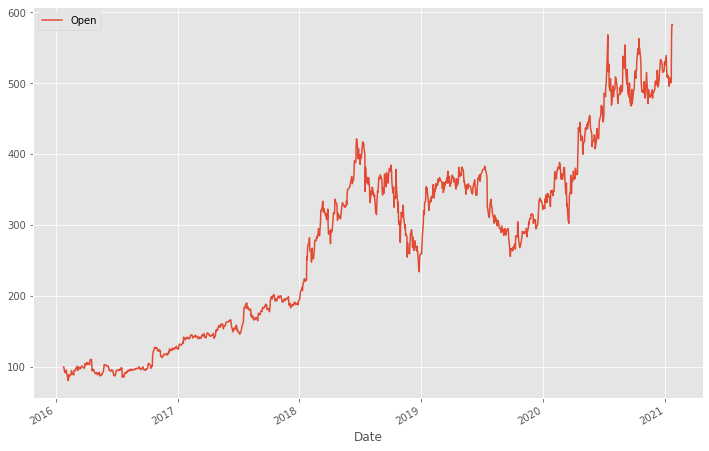

In [ ]:
NFLX['Open'].plot(legend=True,figsize=(12,8))


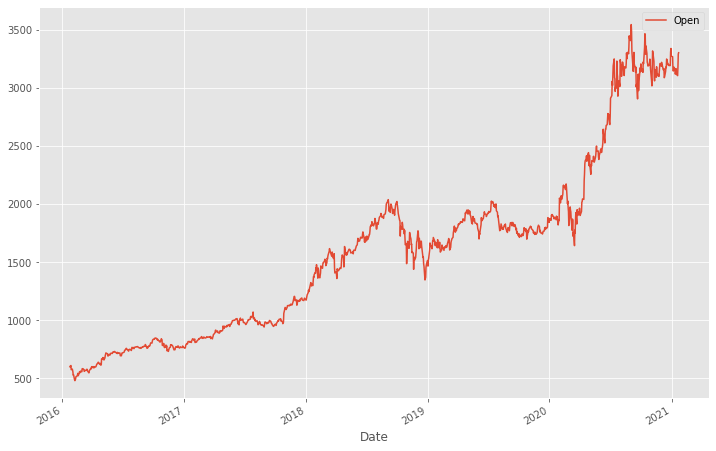

In [ ]:
AMZN['Open'].plot(legend=True,figsize=(12,8))

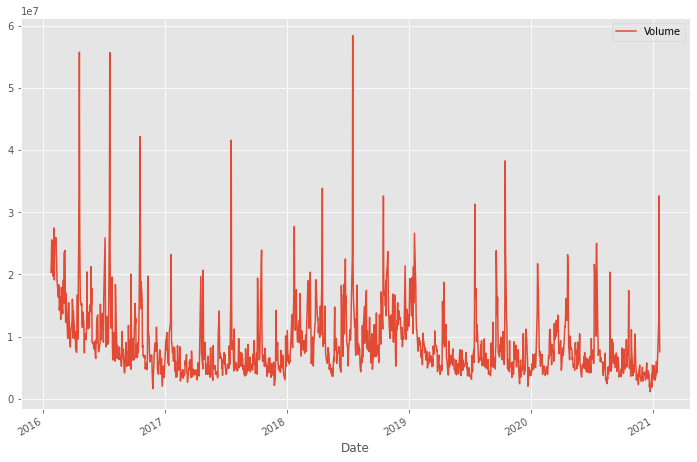

In [ ]:
NFLX['Volume'].plot(legend=True, figsize=(12,8))

We can now create moing averages for the stock price

In [ ]:
# Pandas has a built-in rolling mean calcualtor 

MA_day = [20, 50, 100, 200]

for ma in MA_day:
    column_name = 'MA for %s days' %(str(ma))
    NFLX[column_name] = NFLX['Close'].rolling(window=ma).mean()

Plot the moving averages for netlix stock

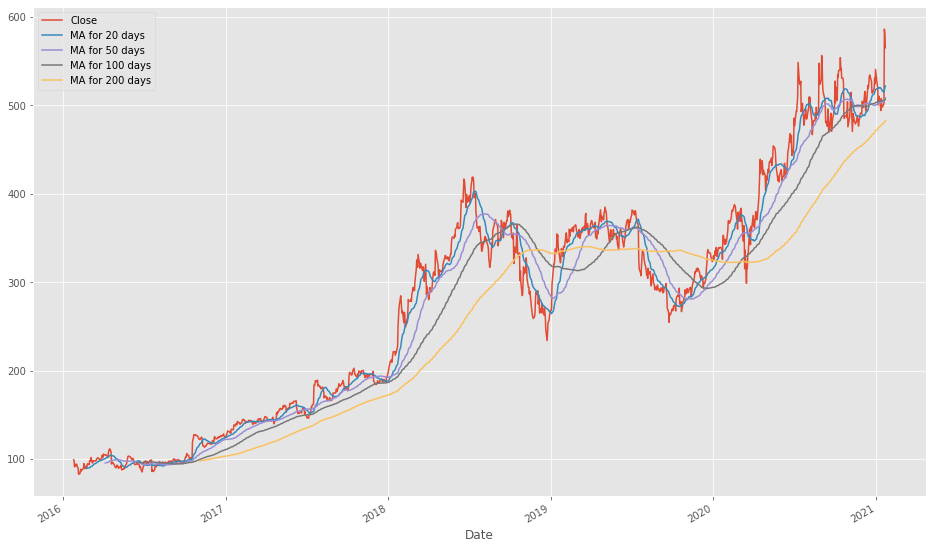

In [ ]:
NFLX[['Close', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days', 'MA for 200 days']].plot(subplots=False, figsize=(16,10))

## Daily Returns analysis

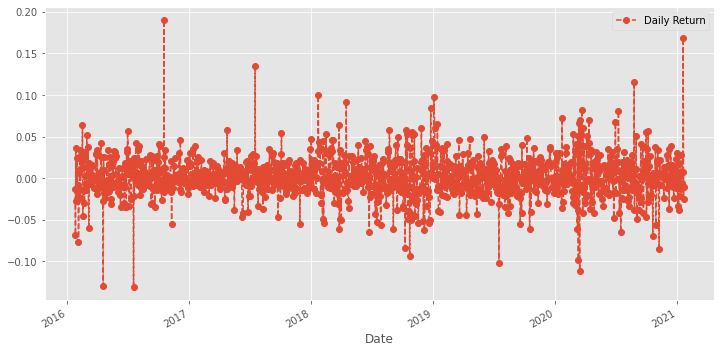

In [ ]:
#We shall use the pct_change to find the percent change for each day
NFLX['Daily Return'] = NFLX['Close'].pct_change()

#Let's plot the daily return percentage
NFLX['Daily Return'].plot(figsize=(12,6), legend=True, linestyle= '--', marker='o')

In [ ]:
#We shall use the pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Close'].pct_change()
#We shall use the pct_change to find the percent change for each day
AMZN['Daily Return'] = AMZN['Close'].pct_change()
#We shall use the pct_change to find the percent change for each day
GOOGL['Daily Return'] = GOOGL['Close'].pct_change()


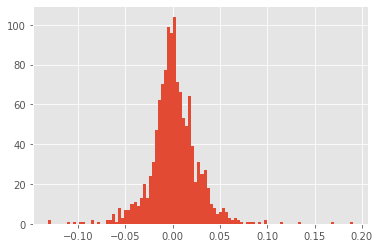

In [ ]:
NFLX['Daily Return'].hist(bins=100)

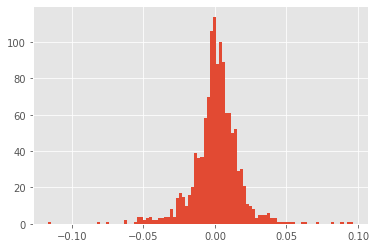

In [ ]:
GOOGL['Daily Return'].hist(bins=100)

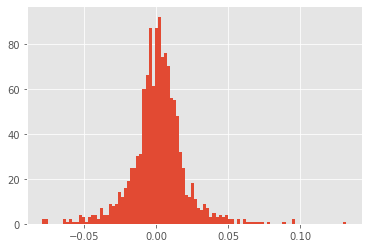

In [ ]:
AMZN['Daily Return'].hist(bins=100)

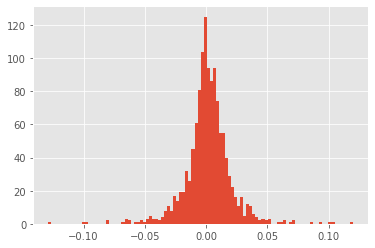

In [ ]:
AAPL['Daily Return'].hist(bins=100)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


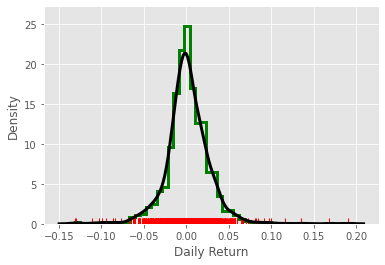

In [ ]:
sns.distplot(NFLX['Daily Return'].dropna(), rug=True, rug_kws={"color": "r"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


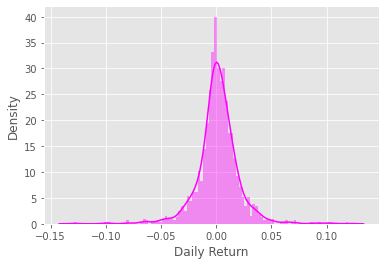

In [ ]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='magenta')

Let us use the closing prices of these stocks and abalyse the returns

In [ ]:
closing_price_df = DataReader(stock_list, 'yahoo', start, end)['Close']

In [ ]:
closing_price_df.head(10)

Symbols,AAPL,GOOGL,AMZN,NFLX
Date,,,,
2016-01-25,24.860001,733.619995,596.530029,99.120003
2016-01-26,24.997499,733.789978,601.250000,97.830002
2016-01-27,23.355000,717.580017,583.349976,91.150002
2016-01-28,23.522499,748.299988,635.349976,94.410004
2016-01-29,24.334999,761.349976,587.000000,91.839996
2016-02-01,24.107500,770.770020,574.809998,94.089996
2016-02-02,23.620001,780.909973,552.099976,91.489998
2016-02-03,24.087500,749.380005,531.070007,90.739998
2016-02-04,24.150000,730.030029,536.260010,89.709999


MAke a returns dataframe

In [ ]:
stock_returns = closing_price_df.pct_change()
stock_returns.head()

Symbols,AAPL,GOOGL,AMZN,NFLX
Date,,,,
2016-01-25,NaN,NaN,NaN,NaN
2016-01-26,0.005531,0.000232,0.007912,-0.013015
2016-01-27,-0.065707,-0.022091,-0.029771,-0.068282
2016-01-28,0.007172,0.042811,0.089140,0.035765
2016-01-29,0.034541,0.017440,-0.076100,-0.027222


Let us compute the correlation between some assets

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


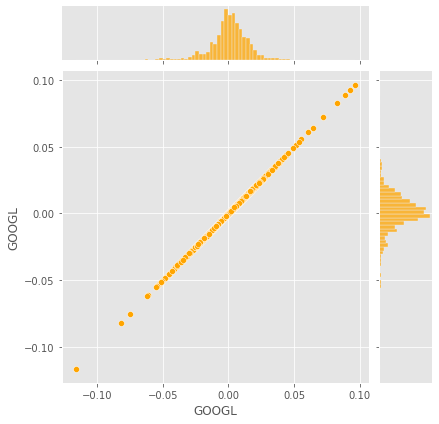

In [ ]:
#Let us start with the correlation of an asset between itself to see how it works
sns.jointplot('GOOGL','GOOGL', stock_returns, kind='scatter', color='orange')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


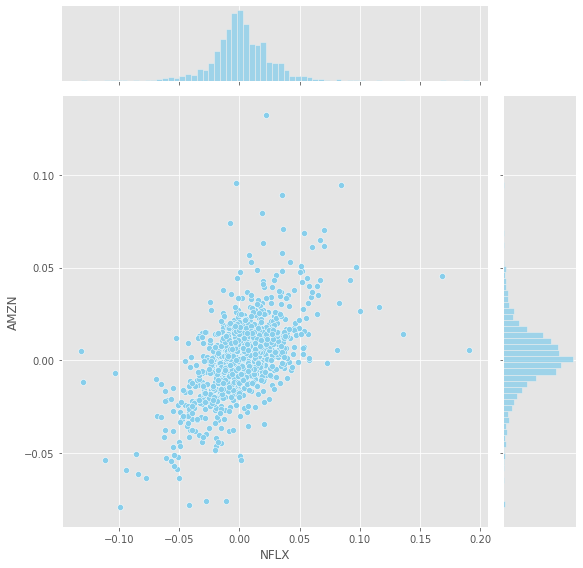

In [ ]:
#Now let's compare Netflix and Amazon
sns.jointplot('NFLX','AMZN', stock_returns, kind='scatter', size=8, color='skyblue')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


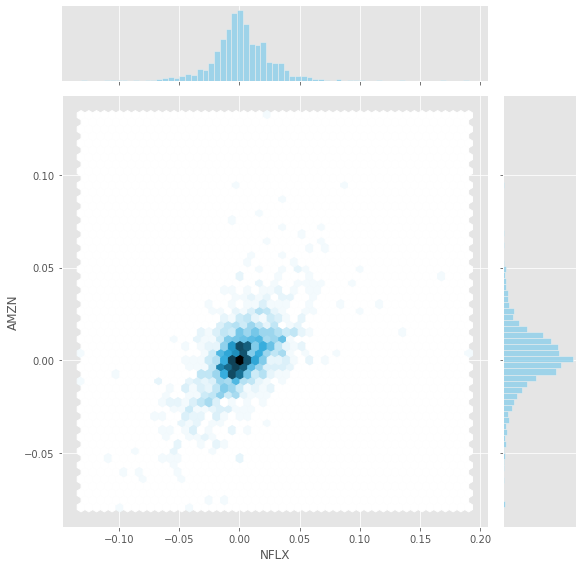

In [ ]:
sns.jointplot('NFLX','AMZN',stock_returns, kind='hex',size=8, color='skyblue')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


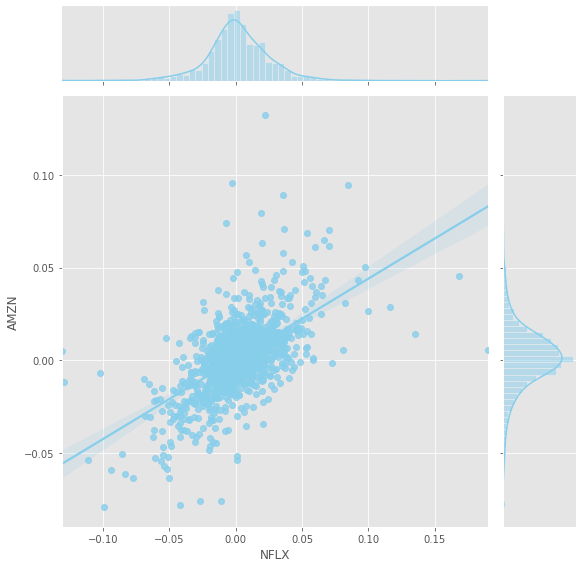

In [ ]:
sns.jointplot('NFLX','AMZN',stock_returns, kind='reg', size=8, color='skyblue')

In the picture above, the Pearson value also known as the Pearson product-moment correlation coefficient can give you a sense of how correlated the aily percentage returns are. We can also 

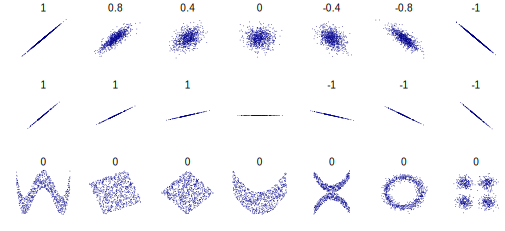

In [ ]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


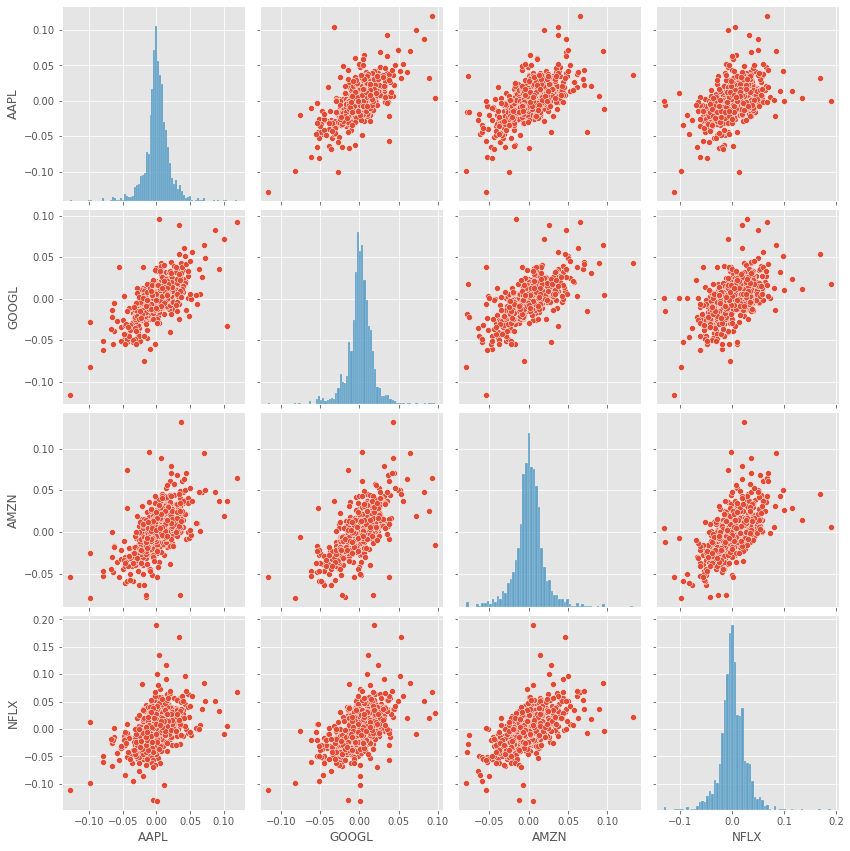

In [ ]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(stock_returns.dropna(),size=3)

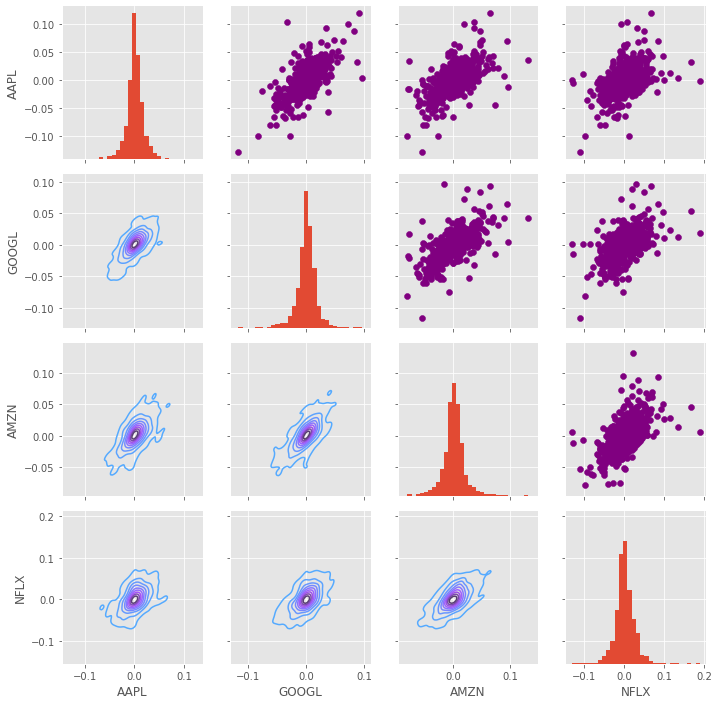

In [ ]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(stock_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

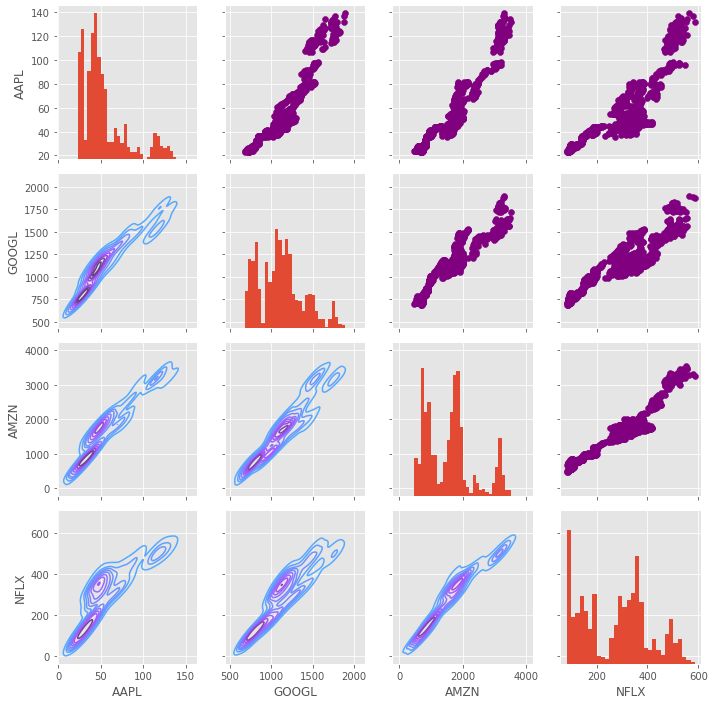

In [ ]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(closing_price_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

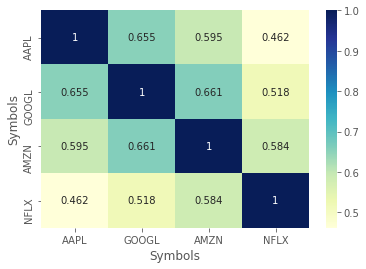

In [ ]:
# Let's go ahead and use seaborn for a quick heatmap to get correlation for the daily return of the stocks.
sns.heatmap(stock_returns.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

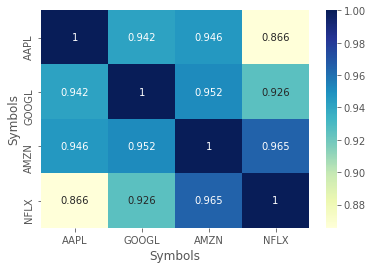

In [ ]:
# Let's go ahead and use seaborn for a quick heatmap to get correlation for the daily return of the stocks.
sns.heatmap(closing_price_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

In [ ]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')